In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

In [3]:
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("Feature names:", feature_names)

df = pd.DataFrame(X, columns=feature_names)
df.head(10)

Number of samples: 178
Number of features: 13
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [5]:
X2 = X[:, :2]  
X2[:10]

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35]])

In [7]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

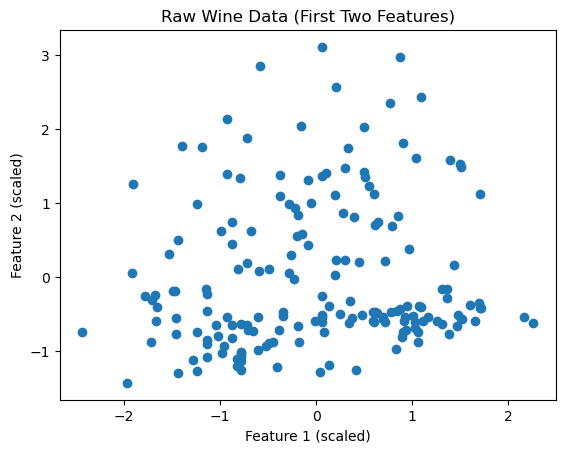

In [9]:
plt.scatter(X2_scaled[:,0], X2_scaled[:,1])
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("Raw Wine Data (First Two Features)")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X2_scaled)
centroids = kmeans.cluster_centers_

print("Cluster Labels:", labels_kmeans[:20])
print("Centroids:\n", centroids)

Cluster Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
Centroids:
 [[-1.00033181 -0.59714283]
 [ 0.09188151  1.39250147]
 [ 0.87009843 -0.493973  ]]


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


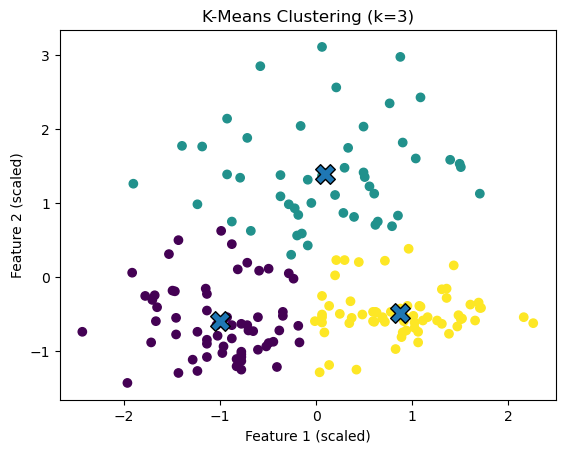

In [13]:
plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c=labels_kmeans)
plt.scatter(centroids[:,0], centroids[:,1], s=200, marker='X', edgecolor='black')
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("K-Means Clustering (k=3)")
plt.show()

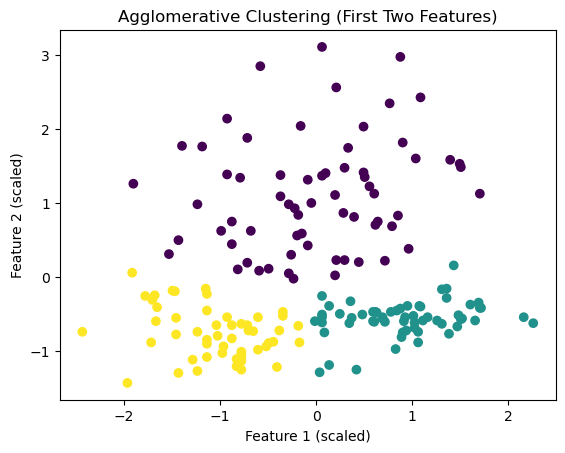

In [15]:
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X2_scaled)

plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c=labels_agg)
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("Agglomerative Clustering (First Two Features)")
plt.show()

In [17]:
X_scaled_all = scaler.fit_transform(X)


In [19]:
kmeans_all = KMeans(n_clusters=3, random_state=42)
labels_k_all = kmeans_all.fit_predict(X_scaled_all)


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
agg_all = AgglomerativeClustering(n_clusters=3)
labels_a_all = agg_all.fit_predict(X_scaled_all)


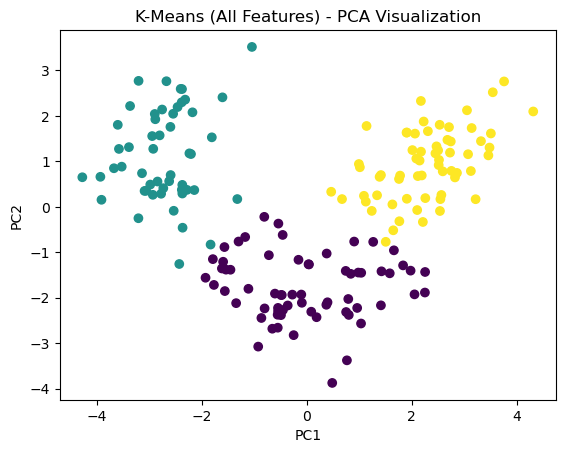

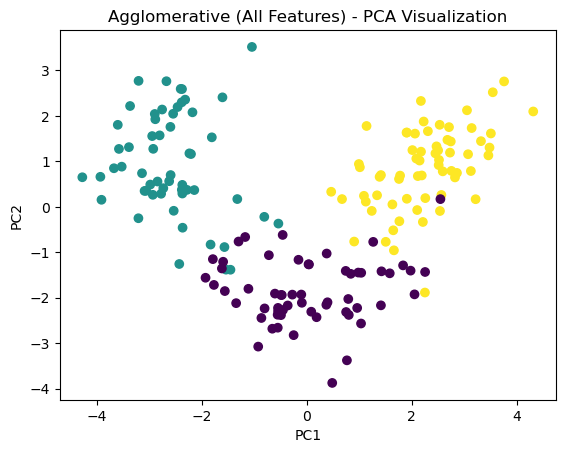

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_all)

# K-Means visualization
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_k_all)
plt.title("K-Means (All Features) - PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Agglomerative visualization
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_a_all)
plt.title("Agglomerative (All Features) - PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()